<a href="https://colab.research.google.com/github/yoonhyun123/AI/blob/main/Fish_market_Data_processing2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7,
               31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5,
               34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0,
               38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 10.5, 10.6, 11.0, 11.2,
               11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0,16.0]

fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 450.0, 500.0, 390.0,
               450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0,
               700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0,
               720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0,
               6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2,
               19.7,19.9]

import numpy as np
np.column_stack(([1,2,3],[4,5,6]))

array([[1, 4],
       [2, 5],
       [3, 6]])

In [5]:
fish_data=np.column_stack((fish_length,fish_weight))
print(len(fish_data))

50


In [6]:
print(np.ones(5))
fish_target=np.concatenate((np.ones(35),np.zeros(15)))
print(len(fish_target))

[1. 1. 1. 1. 1.]
50


In [7]:
print(len(fish_data))   # 49
print(len(fish_target)) # 50 (문제 발생 원인)

50
50


In [8]:
from sklearn.model_selection import train_test_split
train_input,test_input,train_target,test_target=train_test_split(fish_data,fish_target,random_state=42)

In [9]:
print(train_input.shape)
print(test_input.shape)

(37, 2)
(13, 2)


In [10]:
print(train_target.shape)
print(test_target.shape)
print(test_target)

(37,)
(13,)
[1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0.]


In [11]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
kn.fit(train_input,train_target)
kn.score(test_input,test_target)

1.0

In [12]:
print(kn.predict([[25,100]]))

[0.]


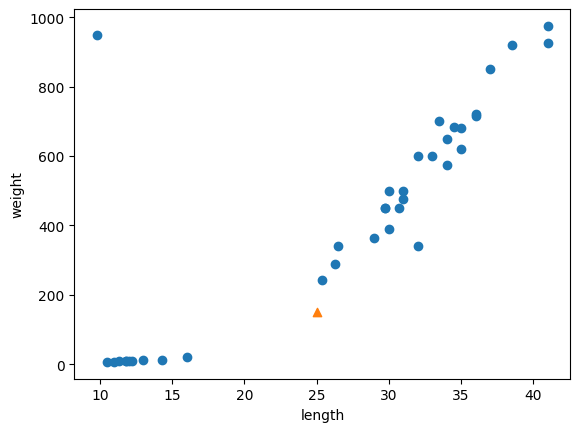

In [13]:
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(25,150,marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

Text(0, 0.5, 'length')

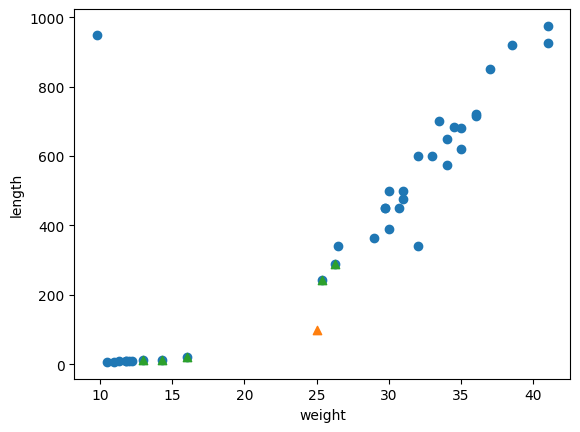

In [14]:
distances,indexes=kn.kneighbors([[25,150]])
plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(25,100,marker='^')
plt.scatter(train_input[indexes,0],train_input[indexes,1],marker='^')
plt.xlabel('weight')
plt.ylabel('length')

In [15]:
print(train_input[indexes])
print(train_target[indexes])

[[[ 25.4 242. ]
  [ 16.   19.9]
  [ 13.   13.4]
  [ 14.3  12.2]
  [ 26.3 290. ]]]
[[1. 0. 0. 0. 1.]]


In [16]:
print(distances)

[[ 92.00086956 130.41092746 137.12607338 138.2147966  140.00603558]]


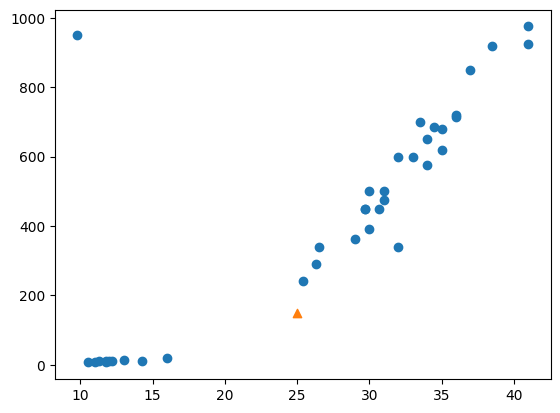

In [17]:
plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(25,150,marker='^')

In [18]:
distances, indexes= kn.kneighbors([[25,100]])

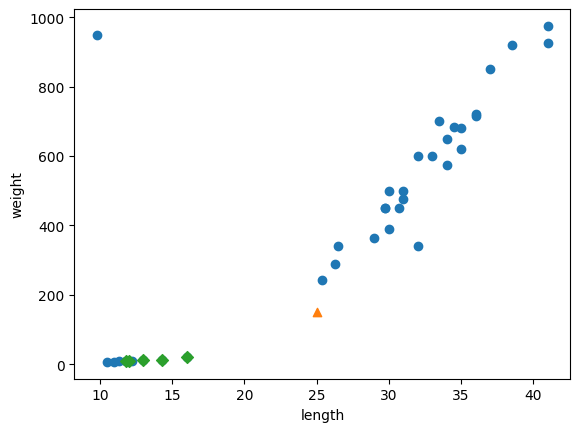

In [19]:
plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(25,150,marker='^')
plt.scatter(train_input[indexes,0],train_input[indexes,1],marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [20]:
print(train_input[indexes])

[[[16.  19.9]
  [13.  13.4]
  [14.3 12.2]
  [11.8 10. ]
  [12.   9.9]]]


In [21]:
print(train_target)

[1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0.
 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0.]


In [22]:
print(distances)

[[80.60403216 87.42745564 88.44959016 90.96284956 91.03301599]]


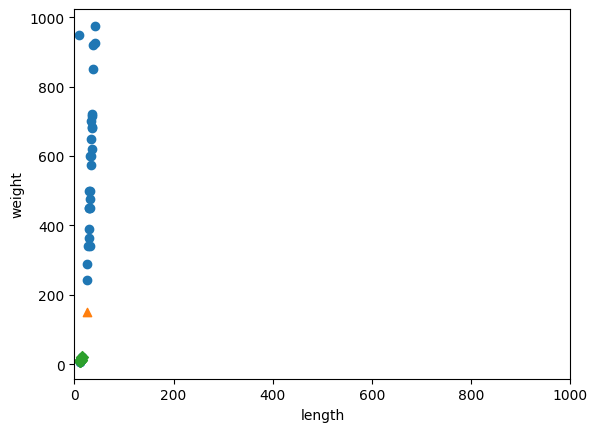

In [23]:
plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(25,150,marker='^')
plt.scatter(train_input[indexes,0],train_input[indexes,1],marker='D')
plt.xlim((0,1000))
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [24]:
mean=np.mean(train_input,axis=0)
std=np.std(train_input,axis=0)

In [25]:
print(mean,std)

[ 26.63513514 434.09189189] [ 10.04366726 312.14231714]


In [26]:
train_scaled=(train_input-mean)/std

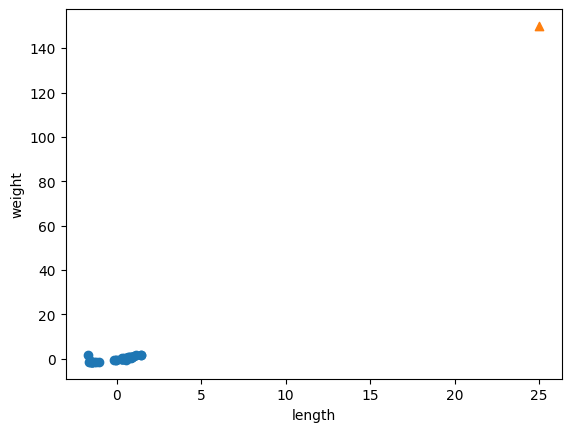

In [29]:
plt.scatter(train_scaled[:,0],train_scaled[:,1])
plt.scatter(25,150,marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

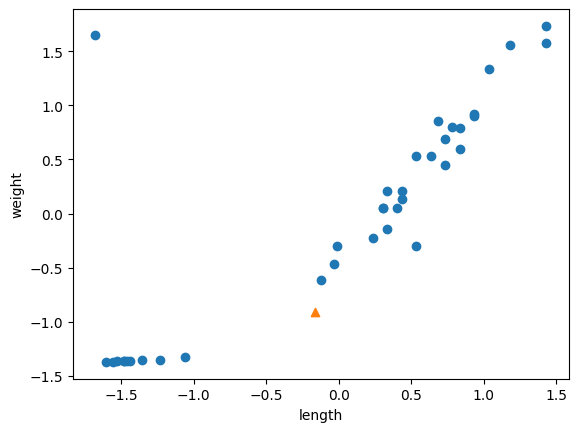

In [32]:
new=([25,150]-mean)/std
plt.scatter(train_scaled[:,0],train_scaled[:,1])
plt.scatter(new[0],new[1],marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [34]:
kn.fit(train_scaled,train_target)
test_scaled=(test_input-mean)/std
kn.score(test_scaled,test_target)
print(kn.predict([new]))

[1.]


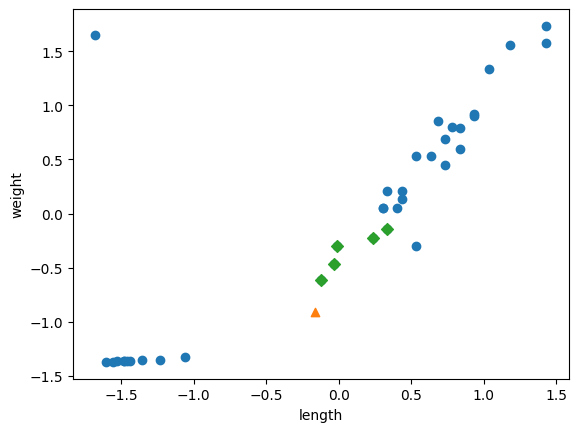

In [35]:
distances,indexes=kn.kneighbors([new])
plt.scatter(train_scaled[:,0],train_scaled[:,1])
plt.scatter(new[0],new[1],marker='^')
plt.scatter(train_scaled[indexes,0],train_scaled[indexes,1],marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()